# Personal Finance Cross-Selling

Objectives: Rather than attracting new customers to increase sales, the alternative way is build relationships with existing customers and encourage them to repeat purchases. From a bank's perspective, to discover the possibility of cross-selling unsecured loan product which is personal finance (PF) to our existing bank customers. 

Source of Data: [Kaggle](https://www.kaggle.com/itsmesunil/bank-loan-modelling)

Work Outline as below: 
* [Scrub Data](#scrub)
  - Imputation Negative Value of Experience
* EDA - [Pie Chart](#pie)
* EDA - [BoxPlot & HistPlot](#boxplt_histplt)
* EDA - [BarPlot](#barplt)
* EDA - [Heatmap](#heatmap) - To study the correlation
* [Feature Selection](#feat)
* [Logistics Regression](#logit)



Description of Variables: 
* `ID` | Customer ID
* `Age` | Customer's age in completed years
* `Experience` | Years of professional experience
* `Income` | Annual income of the customer ($000)
* `ZIPCode` | Home address ZIP code
* `Family` | Family size of the customer
* `CCAvg` | Avg. spending on credit cards per month ($000)
* `Education` | Education Level 
    - 1: Undergrad
    - 2: Graduate
    - 3: Advanced/Professional
* `Mortgage` | Value of house mortgage if any ($000)
* `Personal Loan` | Did this customer accept the personal loan offered in the last campaign?
* `Securities Account` | Does the customer have a securities account with the bank?
* `CD Account` | Does the customer have a certificate of deposit (CD) account with the bank?
* `Online` | Does the customer use internet banking facilities?
* `CreditCard` | Does the customer use a credit card issued by Universal Bank?

In [731]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [732]:
df = pd.read_csv('https://raw.githubusercontent.com/abbylmm/pf_cross_sell/main/pf_data.csv', index_col='ID')
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


<a id='scrub'></a>
# Scrub Data

In [734]:
for cols in df:
    print(cols, ':', df[cols].unique(), '\n')

Age : [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23] 

Experience : [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43] 

Income : [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218] 

ZIP Code : [91107 90089 94

In [735]:
num_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']
binary_cols = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

df[num_cols].describe().applymap(lambda x: f'{x:0.2f}').T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00


* Customer's age is in the range of [23, 67] with average of 45 y/o. Quarter of the customer is below 35 y/o
* Average customer's experience is 20 years, however, there is negative value (min=-3) in experience which is impossible and require imputation
* Average customer's income is $73,770
* 75% customer's family size is 3
* Average monthly credit card spending is $1,940
* 75% cutomer's education is 3 (Advanced/Professional)
* Average mortgage value is $56,500
* Around half of the customer does not have a mortgage 
* Mortgage with 0 value implies customer doesn't have a mortgage - create indicator to show diff
* Columns with binary value are Securities Account, CD Account, Online, CreditCard

### Imputation Negative Value of Experience

In [736]:
# count how many is negative experience

len(df[df['Experience'] < 0])

52

In [737]:
# positive experience

df_exp = df[df['Experience'] >= 0]
len(df_exp)

4948

In [738]:
avg_exp = df_exp['Experience'].mean()
print(f'Average Experience {avg_exp}')

Average Experience 20.33104284559418


In [739]:
df['Experience'] = df['Experience'].apply(lambda x : avg_exp if x < 0 else x)

In [740]:
df[num_cols].describe().applymap(lambda x: f'{x:0.2f}').T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.33,11.25,0.00,11.00,20.33,30.00,43.00
Income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00


# Explore Data

<a id='pie'></a>
### Pie Chart

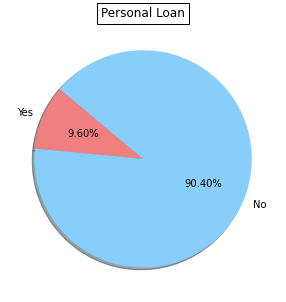

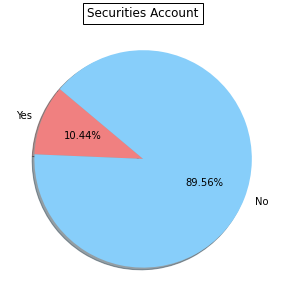

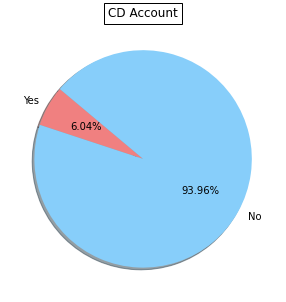

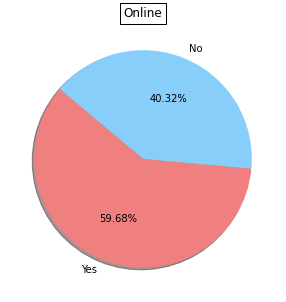

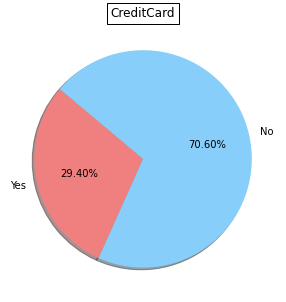

In [741]:
binary_df = df[binary_cols]

for cols in binary_df:
    cnt_yes = len(binary_df[binary_df[cols] == 1])
    cnt_no = len(binary_df[binary_df[cols] == 0])
    percentage = cnt_yes / (cnt_yes + cnt_no) * 100
    data = [percentage, 100-percentage]

    fig = plt.figure(figsize = (5, 5)).set_facecolor('white')
    plt.title(cols, bbox = {'facecolor':'none'})
    plt.pie(data, labels = ['Yes', 'No'], colors = ['lightcoral', 'lightskyblue'], autopct = '%1.2f%%', shadow = True, startangle = 140)
    plt.show()


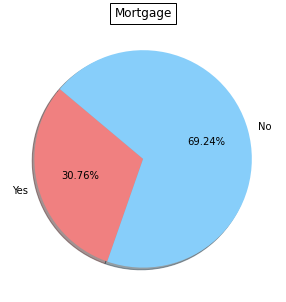

In [742]:
mortgage_yes = len(df[df['Mortgage'] > 0])
mortgage_no = len(df[df['Mortgage'] == 0])
percentage = mortgage_yes / (mortgage_yes + mortgage_no) * 100
data = [percentage, 100-percentage]

fig = plt.figure(figsize = (5, 5)).set_facecolor('white')
plt.title('Mortgage', bbox = {'facecolor':'none'})
plt.pie(data, labels = ['Yes', 'No'], colors = ['lightcoral', 'lightskyblue'], autopct = '%1.2f%%', shadow = True, startangle = 140)
plt.show()

<a id='boxplt_histplt'></a>
### BoxPlot & HistPlot

<AxesSubplot:xlabel='Mortgage', ylabel='Count'>

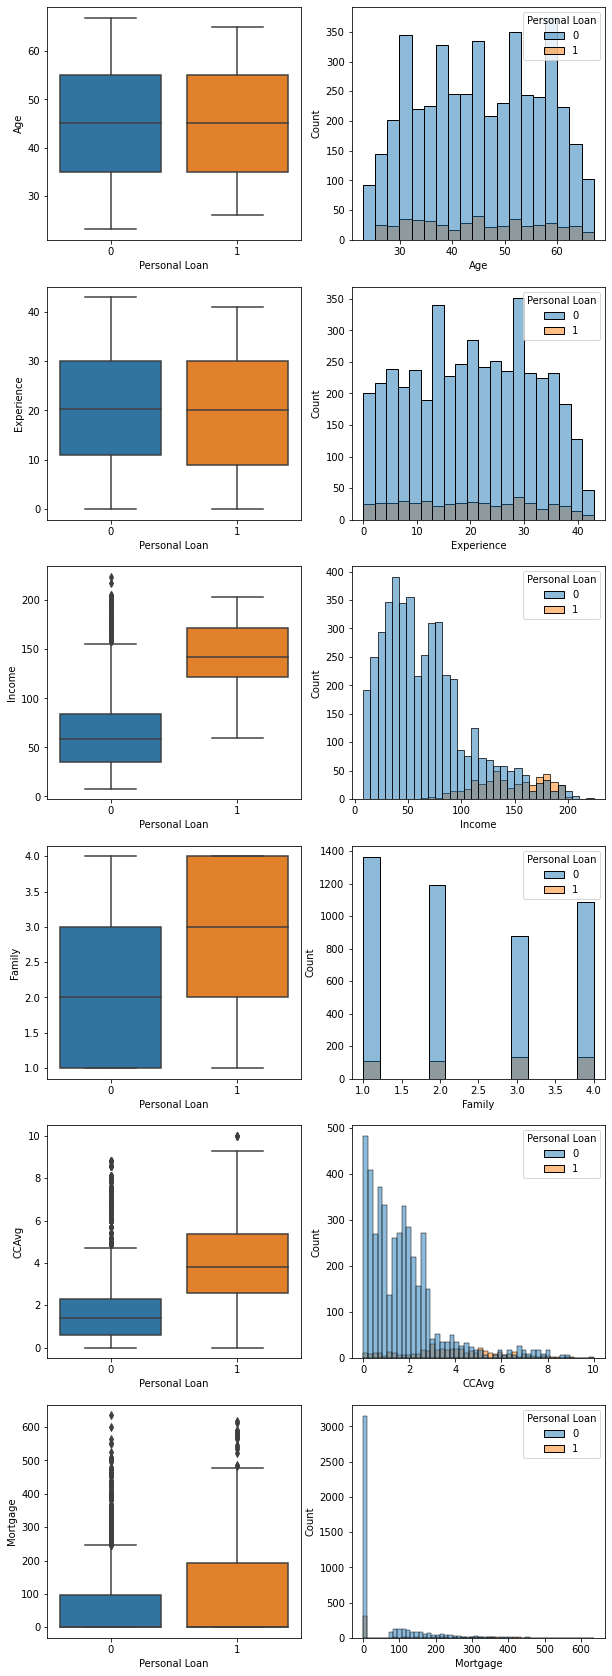

In [743]:
fig, subs = plt.subplots(6, 2, figsize=(10,30))

sns.boxplot(x='Personal Loan', y='Age', data=df, ax=subs[0,0])
sns.histplot(df, x='Age', alpha=.5, hue='Personal Loan', ax=subs[0,1])

sns.boxplot(x='Personal Loan', y='Experience', data=df, ax=subs[1,0])
sns.histplot(df, x='Experience', alpha=.5, hue='Personal Loan', ax=subs[1,1])

sns.boxplot(x='Personal Loan', y='Income', data=df, ax=subs[2,0])
sns.histplot(df, x='Income', alpha=.5, hue='Personal Loan', ax=subs[2,1])

sns.boxplot(x='Personal Loan', y='Family', data=df, ax=subs[3,0])
sns.histplot(df, x='Family', alpha=.5, hue='Personal Loan', ax=subs[3,1])

sns.boxplot(x='Personal Loan', y='CCAvg', data=df, ax=subs[4,0])
sns.histplot(df, x='CCAvg', alpha=.5, hue='Personal Loan', ax=subs[4,1])

sns.boxplot(x='Personal Loan', y='Mortgage', data=df, ax=subs[5,0])
sns.histplot(df, x='Mortgage', alpha=.5, hue='Personal Loan', ax=subs[5,1])

* For `Age` and `Experience`, boxplot shows that it is evenly distributed around the mean and there is no outlier
* The distribution of Age and Experience is similar
* For `Income`, boxplot shows a few outliers beyond 150
* The distribution of Income is highly skewed
* `Family` has 4 discrete values and it's an ordinal categorical variable with no outlier
* The distribution of `CCAvg` is highly skewed
* `Mortgage` has high concentration in 0, a lot of customers does not have a mortgage

<a id='barplt'></a>
### BarPlot

In [744]:
# indicator for mortgage

df['ind_mortgage'] = df['Mortgage'].apply(lambda x : 1 if x > 0 else x)
df['ind_mortgage'].value_counts()

0    3462
1    1538
Name: ind_mortgage, dtype: int64

In [745]:
# binning

df['Age_Bin'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['0-30', '31-40', '41-50', '51-60', '>60'])
df['Experience_Bin'] = pd.cut(df['Experience'], bins = [0, 10, 20, 30, 40, 100], labels = ['0-10', '10-20', '20-30', '30-40', '>40'])
df['Income_Bin'] = pd.cut(df['Income'], bins = [0, 50, 100, 150, 200, 300], labels = ['0-50', '50-100', '100-150', '150-200', '>200'])

df['CCAvg_Bin'] = pd.cut(df['CCAvg'], bins = [0, 2, 4, 6, 100], labels = ['0-2', '3-4', '5-6', '>6'])
df['Mortgage_Bin'] = pd.cut(df['Mortgage'], bins = [0, 200, 400, 600, 800], labels = ['0-200', '200-400', '400-600', '>600'])


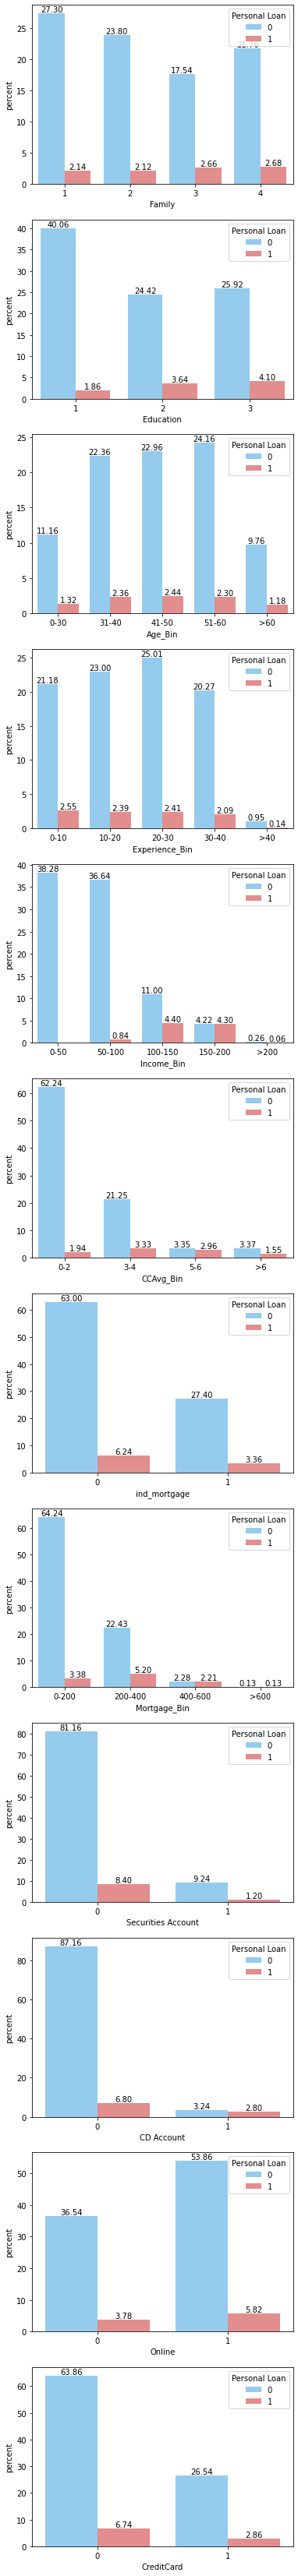

In [746]:
cols = ['Family', 'Education', 'Age_Bin', 'Experience_Bin', 'Income_Bin', 'CCAvg_Bin', 'ind_mortgage', 'Mortgage_Bin', 
        'Securities Account', 'CD Account', 'Online', 'CreditCard']

fig, subs = plt.subplots(len(cols), 1, figsize=(6,60))

for i in range(len(cols)): 
    data = df.groupby(cols[i])['Personal Loan'].value_counts().reset_index(name='count')
    data['percent'] = (data['count'] / df[cols[i]].count()) * 100
    plots = sns.barplot(x=cols[i], y='percent', hue='Personal Loan', data=data, palette=['lightskyblue', 'lightcoral'], ax=subs[i])

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                      (bar.get_x() + bar.get_width() / 2,
                       bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 5),
                       textcoords='offset points')

* `Family` | Having a bigger family (~4 members) will more likely to have a PF
* `Education` | Majority is Undergrads. The higher the education level, the higher likelihood in getting a PF
* `Age` | Majority is 51-60. Age (41-50) has the highest number of customers with a PF, followed by Age (31-40)
* `Experience` | Majority is with 20-30 years of professional experience. Customers with experience less than 10 years have highest chance in getting a PF
* `Income` | Customers with a mid-level income between $100k-200k have more PF than customers with a lower/higher level income
* `CCAvg` | More than half of the customers have an average monthly CC spend of 0-2. Average monthly CC spend of 3-4 has the highest number of PF, followed by 5-6
* `ind_mortgage` | Around 30% customers own a mortgage. Customers without a mortgage have higher chance in getting a PF
* `Mortgage` | With a mortgage, mortgage value between 200-400 has higher likelihood in getting a PF
* `Securities Account` | 90% of customers have a securities account with the bank. Without a securities account has lower PF
* `CD Account` | 90% of customers have a certificate of deposit (CD) account with the bank. Without a CD account has lower PF
* `Online` | More than half of the customers use internet banking. Customers with internet banking are more interested in opting for PF maybe because spending money online is easy and tempting
* `CreditCard` | Ratio of customers with CC issued by Universal Bank and without CC issued by Universal Bank is almost 1:2

<a id='heatmap'></a>
### Heatmap

In [747]:
corr_df = df.drop(['ind_mortgage', 'ZIP Code'], axis=1)

C:\Users\munmun\AppData\Local\Temp/ipykernel_13680/1452286860.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


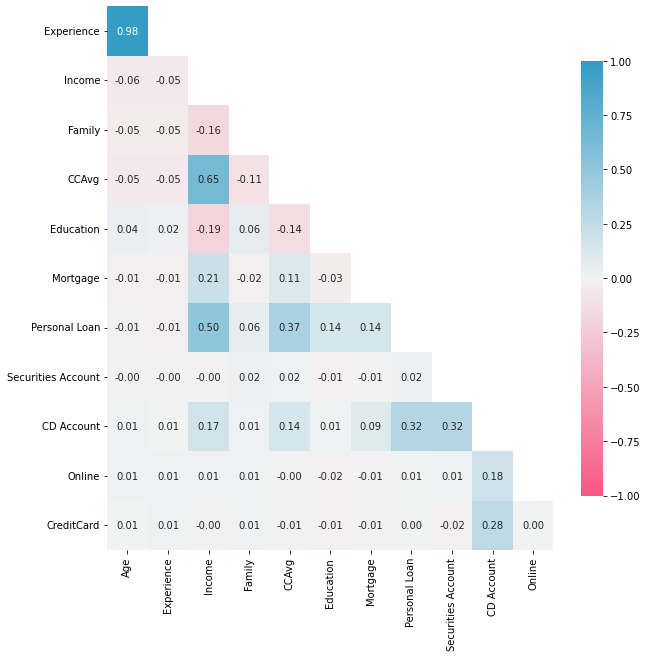

In [748]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10))

corr = corr_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap=cmap, vmin=-1, vmax=1, cbar_kws={'shrink': .8})

plt.show()

`Correlations among Explanatory Variables`
* Since Age and Experience are highly correlated (0.98), implying that they are actually measuring similar things so one can drop the Experience

Text(0.5, 1.0, 'Correlation with Personal Loan')

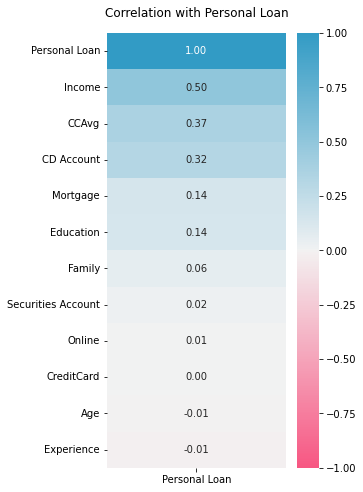

In [749]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(corr_df.corr()[['Personal Loan']].sort_values(by='Personal Loan', ascending=False), vmin=-1, vmax=1, annot=True, cmap=cmap, fmt='.2f')
heatmap.set_title('Correlation with Personal Loan', fontdict={'fontsize':12}, pad=16)


`Correlation with Personal Loan`
* Experience, Age, CreditCard, Online, Securities Account have very low correlation

<a id='feat'></a>
# Feature Selection

In [750]:
# exclude experience

filter_cols = ['Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Family', 
               'Securities Account', 'Online', 'CreditCard', 'Age']

In [751]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

train_data = df[filter_cols]
train_labels = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

<AxesSubplot:>

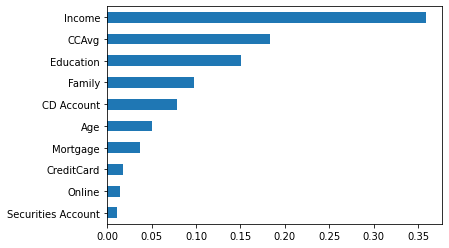

In [752]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=True,inplace=True)
feat_importances.plot(kind="barh")

Method of Variable Reduction
* By evaluating the information value (IV) gained from each variable in the context of the target variable
* To remove redundant features (if any) do not effectively contribute to the model training
* Reduces the complexity of a model and makes it easier to interpret
* From here, it is noticed that Income, CCAvg, Education, Family, CD Account are most significant features

<a id='logit'></a>
# Logistics Regression

In [753]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [754]:
reg = LogisticRegression(solver='lbfgs', max_iter=1000)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [755]:
# predict the test data to get y_pred
y_pred = reg.predict(X_test)

# get accuracy of model
accuracy_score = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model: {accuracy_score:.2%}")

The accuracy of the model: 94.93%


In [756]:
summary_table = pd.DataFrame(columns=['Features'], data=filter_cols)
summary_table['Coefficient'] = np.transpose(reg.coef_)

In [757]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [758]:
summary_table['Odds_Ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_Ratio', ascending=False)

,Features,Coefficient,Odds_Ratio
3,CD Account,3.289464,26.828483
5,Education,1.654679,5.231401
6,Family,0.711007,2.036040
2,CCAvg,0.166624,1.181310
1,Income,0.052468,1.053869
10,Age,0.005435,1.005449
4,Mortgage,0.000774,1.000774
8,Online,-0.529049,0.589165
7,Securities Account,-0.852324,0.426423
9,CreditCard,-0.951135,0.386302


Customers more likely own a PF:
* With a certificate of deposit (CD) account
* Higher educated
* Larger family's size
* Higher average monthly CC spend
* Higher income

In [759]:
f1_score = f1_score(y_test, y_pred)
print(f"The f1-score of the model: {f1_score:.2%}")

The f1-score of the model: 69.60%


In [760]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.86      0.58      0.70       149

    accuracy                           0.95      1500
   macro avg       0.91      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



Evaluation: f1-score
* The weighted average of precision and recall
* To minimize both false positive (FP) as well as false negative (FN)

Observations: 
* It can be seen that model accuracy is good, f1-score is 70% with recall value is moderate (58%) for class 1. 
* Recall value of 58% means out of all the customers who actually buy PF product, 58% were correctly predicted to be positive (would actually buy PF product). Thus, the bank is missing on 42% of potential customers resulting in recampaigning cost. 
* Precision value means out of all positively predicted customers (would actually buy PF product), 86% were correctly predicted. 

[Text(0, 0.5, 'No PF'), Text(0, 1.5, 'Yes PF')]

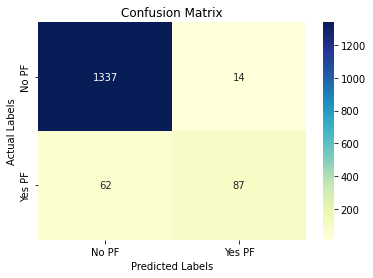

In [761]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='', ax=ax, cmap='YlGnBu')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No PF', 'Yes PF'])
ax.yaxis.set_ticklabels(['No PF', 'Yes PF'])

* TP - 87 obs correctly predicted customers with PF
* FP - 14 obs incorrectly predicted customers with PF
* TN - 1337 obs correctly predicted customers without PF
* FN - 62 obs incorrectly predicted customer without PF
